In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv("UV.csv")


In [4]:
dataframe

,68880,1,19:08
0,76080,1,21:08
1,67800,1,18:50
2,76740,1,21:19
3,42960,1,11:56
4,67020,1,18:37
5,66840,1,18:34
6,64500,1,17:55
7,78780,1,21:53
8,79140,1,21:59
9,77400,1,21:30


In [5]:
X=dataframe.iloc[:,0].values
y=dataframe.iloc[:,1].values

In [6]:
X

array([76080, 67800, 76740, 42960, 67020, 66840, 64500, 78780, 79140,
       77400, 71280, 73620, 71040, 71220, 73320, 78960, 56340, 79500,
       49620, 49440, 75660, 55380, 66660, 42600, 75000, 71100, 52020,
       61500, 28560, 68820, 74880, 68880, 68400, 68820, 73620, 45960,
       72180, 65400, 65340, 72420, 73740, 62640, 72480, 75960, 65460,
       73140, 76260,  3600,  7200, 10800, 14400, 18000, 21600, 25200,
       28800, 32400, 36000, 39600], dtype=int64)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
X_train = X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc2= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

C:\Users\anshi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [12]:
y_pred= classifier.predict(X_test.reshape(-1,1))
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [13]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

[[6 5]
 [1 6]]
0.6666666666666666


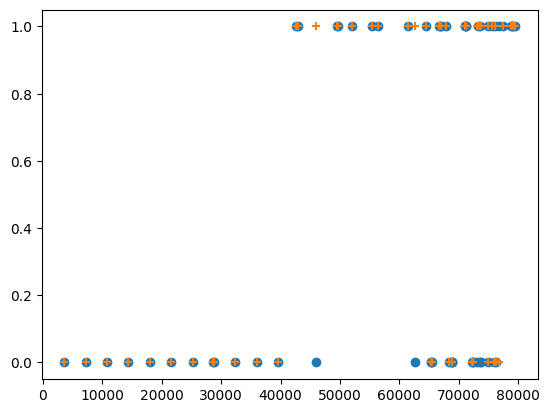

In [15]:
plt.scatter(X,y)
plt.scatter(X,classifier.predict(sc.transform(X.reshape(-1,1))),marker="+")
plt.show()


In [18]:

time = input("Input time in 24 hrs format")
print(time)
time=sum(x * int(t) for x, t in zip([3600, 60, 1], time.split(":")))
print(time)
print("Answer is:")
if(classifier.predict(sc.transform(np.array([[time]]))) == np.array(1)):
    print("Join vc")
else:
    print("Later")
   

15:30
55800
Answer is:
Join vc
